## Heart Disease Prediction Using Decision Tree and Hyperparameter Tuning

In [1]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

# Import decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Importing required packages for visualization
from sklearn import tree
from sklearn.tree import plot_tree

# Evaluate the model
from sklearn.metrics import confusion_matrix, accuracy_score

%matplotlib inline

In [2]:
url = 'https://github.com/vmahawar/data-science-datasets-collection/raw/main/heart_disease.csv'
df = pd.read_csv(url)

In [3]:
df.columns

Index(['age', 'sex', 'BP', 'cholestrol', 'heart disease'], dtype='object')

In [4]:
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [5]:
# Putting feature variable to X
X = df.drop('heart disease',axis=1)

# Putting response variable to y
y = df['heart disease']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((189, 4), (81, 4))

### 0. Helper Functions to evaluate model performance and help plot the decision tree

#### Plot Decision Tree

In [8]:
def get_dt_graph(dt_classifier):  
    plt.figure(figsize=[15,8])
    graph = plot_tree(dt_classifier,feature_names=X.columns.tolist(),
            class_names=['No Disease','Disease']) #0,1
    return graph

#### Evaluate Model

In [9]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

### 1. `max_depth` - Fitting the decision tree with default hyperparameters, apart from max_depth which is 3 so that we can plot and read the tree.

In [10]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'x[0] <= 54.5\ngini = 0.498\nsamples = 189\nvalue = [101, 88]'),
 Text(0.25, 0.625, 'x[1] <= 0.5\ngini = 0.416\nsamples = 88\nvalue = [62, 26]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[3] <= 300.0\ngini = 0.091\nsamples = 21\nvalue = [20, 1]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 19\nvalue = [19, 0]'),
 Text(0.1875, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.375, 0.375, 'x[0] <= 40.5\ngini = 0.468\nsamples = 67\nvalue = [42, 25]'),
 Text(0.3125, 0.125, 'gini = 0.444\nsamples = 9\nvalue = [3, 6]'),
 Text(0.4375, 0.125, 'gini = 0.441\nsamples = 58\nvalue = [39, 19]'),
 Text(0.75, 0.625, 'x[1] <= 0.5\ngini = 0.474\nsamples = 101\nvalue = [39, 62]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[2] <= 167.0\ngini = 0.47\nsamples = 37\nvalue = [23, 14]'),
 Text(0.5625, 0.125, 'gini = 0.422\nsamples = 33\nvalue = [23, 10]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.875, 0.375, 'x[3] <= 272.5\ngini

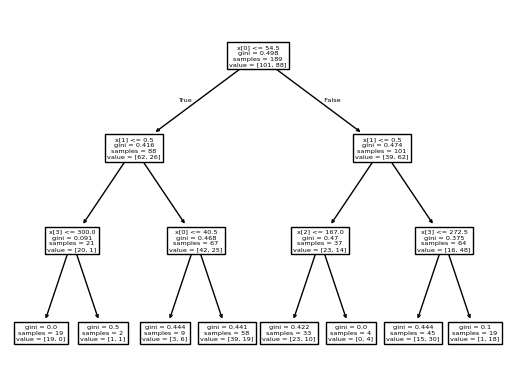

In [11]:
tree.plot_tree(dt.fit(X_train,y_train))

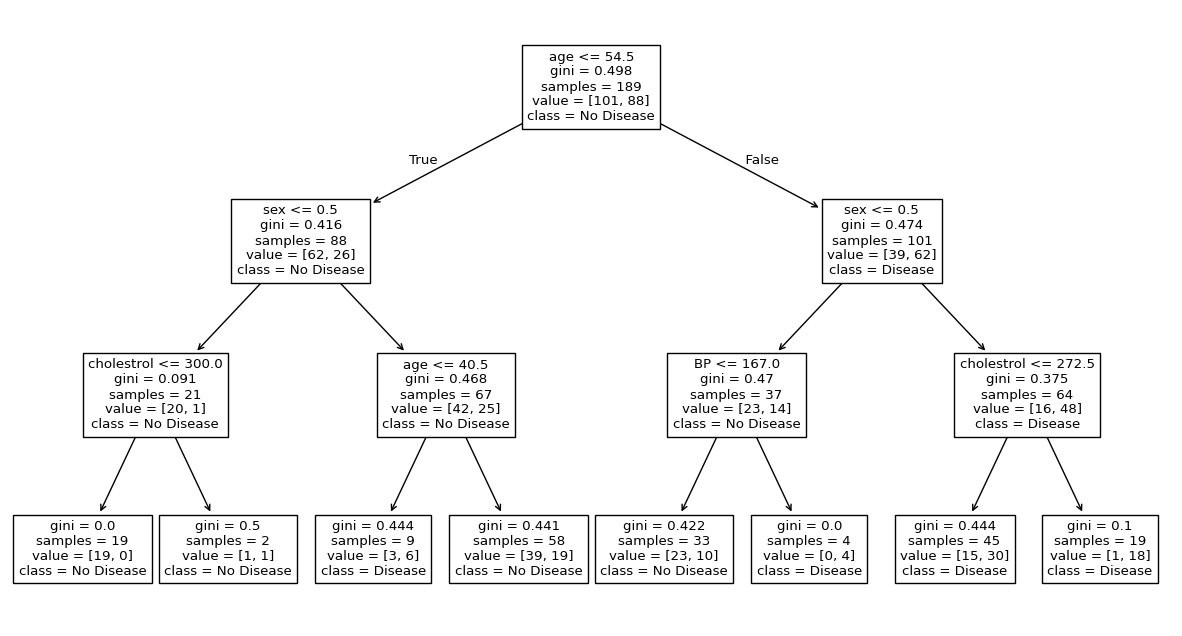

In [12]:
plt.figure(figsize=[15,8])
plot_tree(dt,feature_names=X.columns.tolist(),
          class_names=['No Disease','Disease']) #0,1
plt.show()

#### Evaluating model performance

In [13]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [14]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.7407407407407407


array([[82, 19],
       [30, 58]], dtype=int64)

In [15]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.6049382716049383


array([[35, 14],
       [18, 14]], dtype=int64)

## 2. `default` - Without setting any hyper-parameters

In [16]:
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

[Text(0.4362980769230769, 0.96875, 'age <= 54.5\ngini = 0.498\nsamples = 189\nvalue = [101, 88]\nclass = No Disease'),
 Text(0.12259615384615384, 0.90625, 'sex <= 0.5\ngini = 0.416\nsamples = 88\nvalue = [62, 26]\nclass = No Disease'),
 Text(0.27944711538461536, 0.9375, 'True  '),
 Text(0.038461538461538464, 0.84375, 'cholestrol <= 300.0\ngini = 0.091\nsamples = 21\nvalue = [20, 1]\nclass = No Disease'),
 Text(0.019230769230769232, 0.78125, 'gini = 0.0\nsamples = 19\nvalue = [19, 0]\nclass = No Disease'),
 Text(0.057692307692307696, 0.78125, 'BP <= 128.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = No Disease'),
 Text(0.038461538461538464, 0.71875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = No Disease'),
 Text(0.07692307692307693, 0.71875, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Disease'),
 Text(0.20673076923076922, 0.84375, 'age <= 40.5\ngini = 0.468\nsamples = 67\nvalue = [42, 25]\nclass = No Disease'),
 Text(0.1346153846153846, 0.78125, 'age <= 34.5\ngini = 0.4

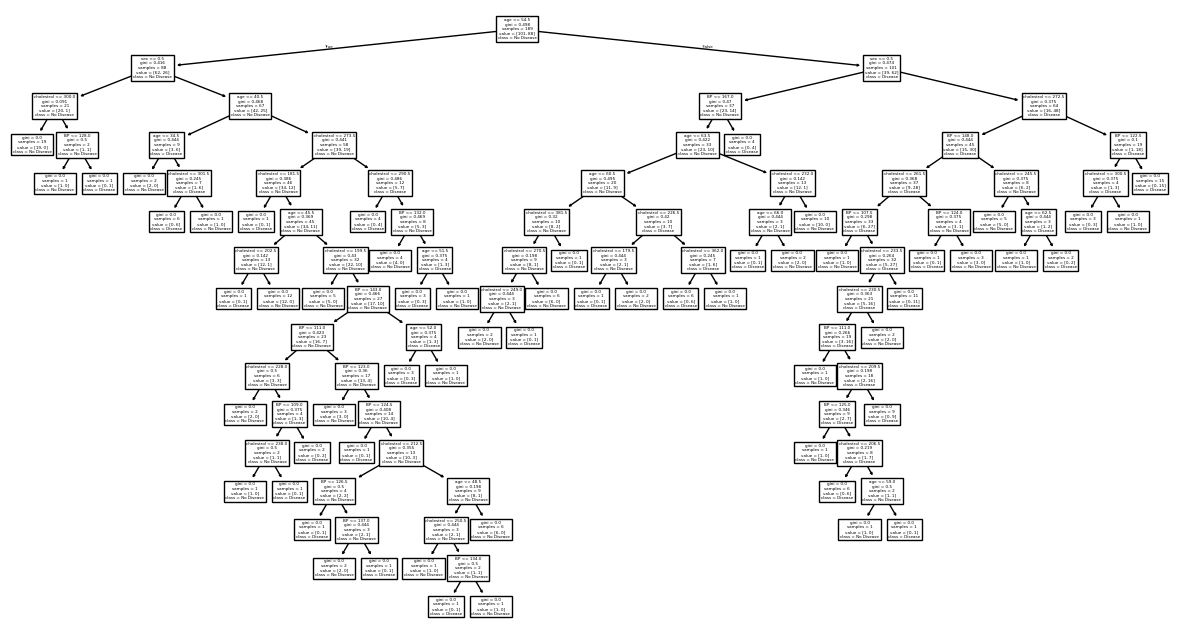

In [17]:
get_dt_graph(dt_default)

In [18]:
evaluate_model(dt_default)

Train Accuracy : 1.0
Train Confusion Matrix:
[[101   0]
 [  0  88]]
--------------------------------------------------
Test Accuracy : 0.6296296296296297
Test Confusion Matrix:
[[31 18]
 [12 20]]


Check the doc for DecisionTreeClassifier

In [19]:
?DecisionTreeClassifier

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
    monotonic_cst=None,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None

## 3. `max_depth` - Controlling the depth of the tree

In [20]:
dt_depth = DecisionTreeClassifier(max_depth=3)
dt_depth.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'age <= 54.5\ngini = 0.498\nsamples = 189\nvalue = [101, 88]\nclass = No Disease'),
 Text(0.25, 0.625, 'sex <= 0.5\ngini = 0.416\nsamples = 88\nvalue = [62, 26]\nclass = No Disease'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'cholestrol <= 300.0\ngini = 0.091\nsamples = 21\nvalue = [20, 1]\nclass = No Disease'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 19\nvalue = [19, 0]\nclass = No Disease'),
 Text(0.1875, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = No Disease'),
 Text(0.375, 0.375, 'age <= 40.5\ngini = 0.468\nsamples = 67\nvalue = [42, 25]\nclass = No Disease'),
 Text(0.3125, 0.125, 'gini = 0.444\nsamples = 9\nvalue = [3, 6]\nclass = Disease'),
 Text(0.4375, 0.125, 'gini = 0.441\nsamples = 58\nvalue = [39, 19]\nclass = No Disease'),
 Text(0.75, 0.625, 'sex <= 0.5\ngini = 0.474\nsamples = 101\nvalue = [39, 62]\nclass = Disease'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'BP <= 167.0\ngini = 0.47\nsamples = 37\nvalue = [23, 14]\ncla

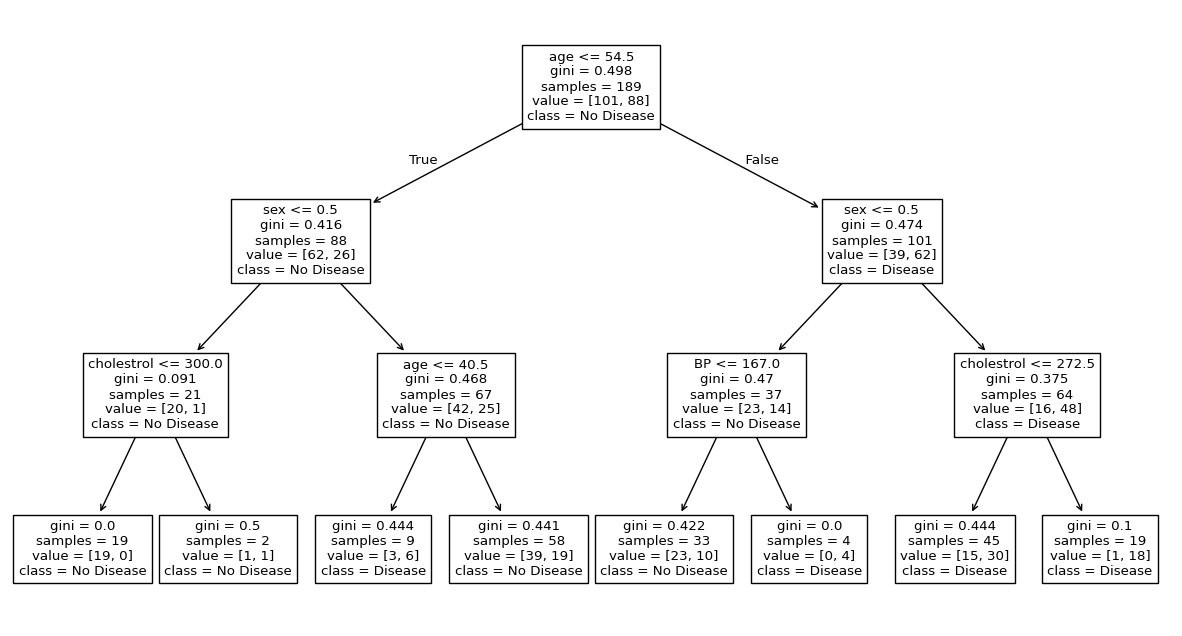

In [21]:
get_dt_graph(dt_depth)
# gph = get_dt_graph(dt_depth) 
# Image(gph.create_png())

In [22]:
evaluate_model(dt_depth)

Train Accuracy : 0.7407407407407407
Train Confusion Matrix:
[[82 19]
 [30 58]]
--------------------------------------------------
Test Accuracy : 0.6049382716049383
Test Confusion Matrix:
[[35 14]
 [18 14]]


## 4. `min_samples_split` - Specifying minimum samples before split

In [23]:
dt_min_split = DecisionTreeClassifier(min_samples_split=20)
dt_min_split.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=20)

[Text(0.5, 0.95, 'age <= 54.5\ngini = 0.498\nsamples = 189\nvalue = [101, 88]\nclass = No Disease'),
 Text(0.2222222222222222, 0.85, 'sex <= 0.5\ngini = 0.416\nsamples = 88\nvalue = [62, 26]\nclass = No Disease'),
 Text(0.3611111111111111, 0.8999999999999999, 'True  '),
 Text(0.1111111111111111, 0.75, 'cholestrol <= 300.0\ngini = 0.091\nsamples = 21\nvalue = [20, 1]\nclass = No Disease'),
 Text(0.05555555555555555, 0.65, 'gini = 0.0\nsamples = 19\nvalue = [19, 0]\nclass = No Disease'),
 Text(0.16666666666666666, 0.65, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = No Disease'),
 Text(0.3333333333333333, 0.75, 'age <= 40.5\ngini = 0.468\nsamples = 67\nvalue = [42, 25]\nclass = No Disease'),
 Text(0.2777777777777778, 0.65, 'gini = 0.444\nsamples = 9\nvalue = [3, 6]\nclass = Disease'),
 Text(0.3888888888888889, 0.65, 'cholestrol <= 273.5\ngini = 0.441\nsamples = 58\nvalue = [39, 19]\nclass = No Disease'),
 Text(0.3333333333333333, 0.55, 'cholestrol <= 181.5\ngini = 0.386\nsamples = 46\

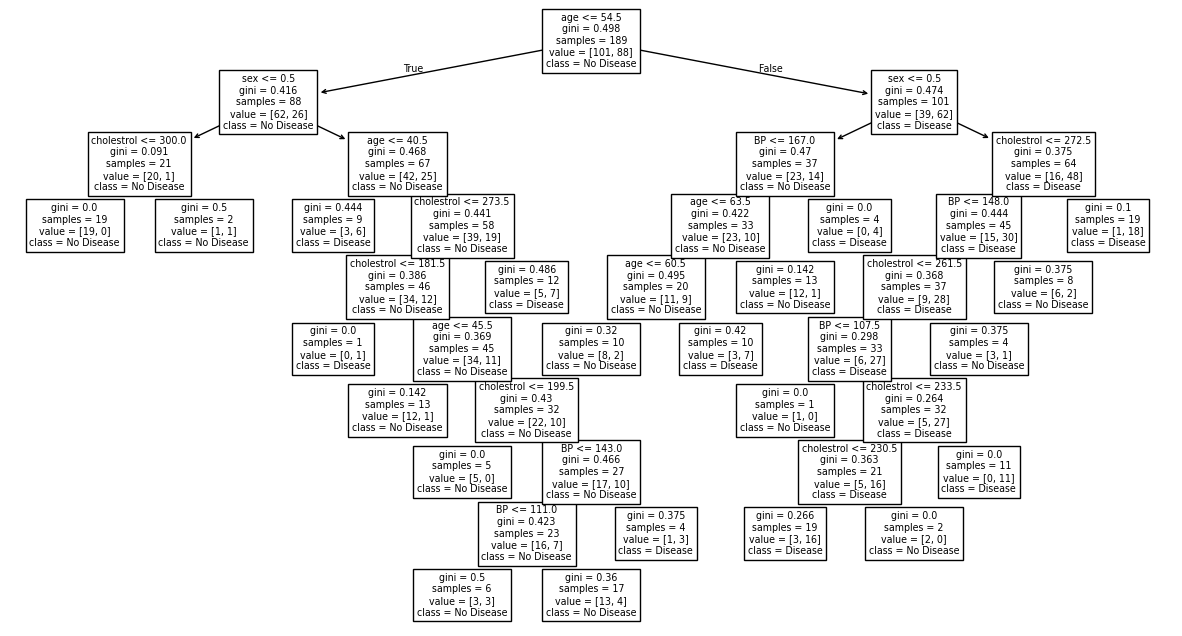

In [24]:
get_dt_graph(dt_min_split)
# gph = get_dt_graph(dt_min_split) 
# Image(gph.create_png())

In [25]:
evaluate_model(dt_min_split)

Train Accuracy : 0.8359788359788359
Train Confusion Matrix:
[[85 16]
 [15 73]]
--------------------------------------------------
Test Accuracy : 0.6419753086419753
Test Confusion Matrix:
[[32 17]
 [12 20]]


## 5. `min_samples_leaf` - Specifying minimum samples in leaf node

In [26]:
dt_min_leaf = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
dt_min_leaf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

[Text(0.4444444444444444, 0.9, 'age <= 54.5\ngini = 0.498\nsamples = 189\nvalue = [101, 88]\nclass = No Disease'),
 Text(0.2222222222222222, 0.7, 'sex <= 0.5\ngini = 0.416\nsamples = 88\nvalue = [62, 26]\nclass = No Disease'),
 Text(0.3333333333333333, 0.8, 'True  '),
 Text(0.1111111111111111, 0.5, 'gini = 0.091\nsamples = 21\nvalue = [20, 1]\nclass = No Disease'),
 Text(0.3333333333333333, 0.5, 'cholestrol <= 253.0\ngini = 0.468\nsamples = 67\nvalue = [42, 25]\nclass = No Disease'),
 Text(0.2222222222222222, 0.3, 'BP <= 121.0\ngini = 0.435\nsamples = 47\nvalue = [32, 15]\nclass = No Disease'),
 Text(0.1111111111111111, 0.1, 'gini = 0.483\nsamples = 22\nvalue = [13, 9]\nclass = No Disease'),
 Text(0.3333333333333333, 0.1, 'gini = 0.365\nsamples = 25\nvalue = [19, 6]\nclass = No Disease'),
 Text(0.4444444444444444, 0.3, 'gini = 0.5\nsamples = 20\nvalue = [10, 10]\nclass = No Disease'),
 Text(0.6666666666666666, 0.7, 'sex <= 0.5\ngini = 0.474\nsamples = 101\nvalue = [39, 62]\nclass = Dis

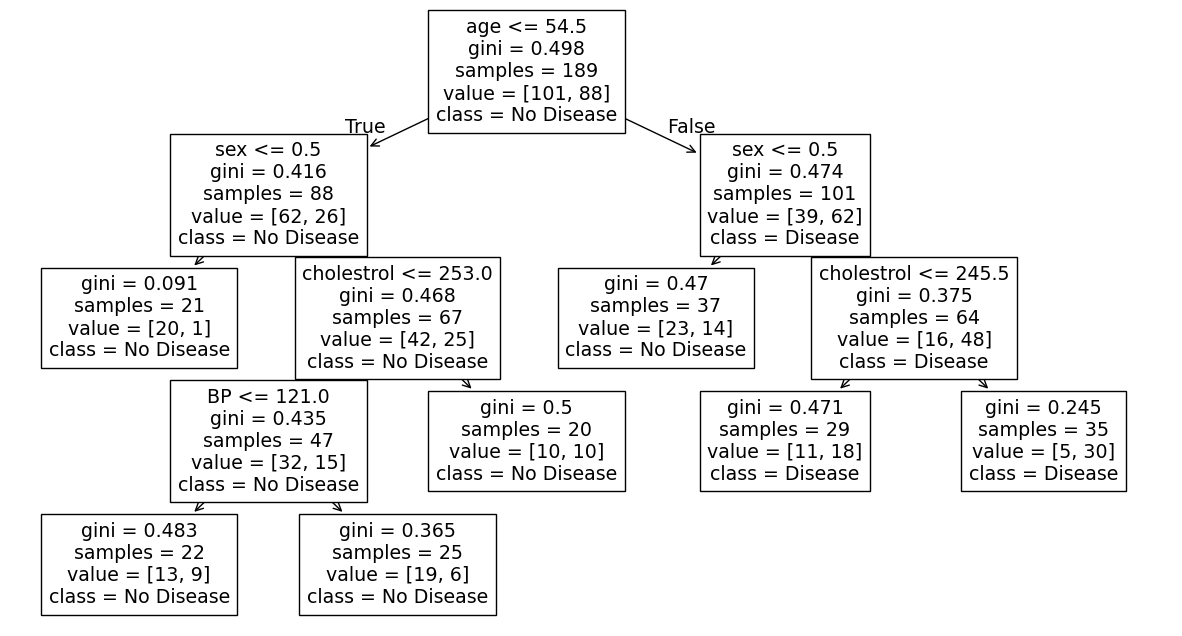

In [27]:
get_dt_graph(dt_min_leaf)

In [28]:
evaluate_model(dt_min_leaf)

Train Accuracy : 0.7037037037037037
Train Confusion Matrix:
[[85 16]
 [40 48]]
--------------------------------------------------
Test Accuracy : 0.6419753086419753
Test Confusion Matrix:
[[38 11]
 [18 14]]


### `min_samples_leaf` = 1

In [29]:
dt_min_leaf = DecisionTreeClassifier(min_samples_leaf=1, random_state=42)
dt_min_leaf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

[Text(0.4362980769230769, 0.96875, 'age <= 54.5\ngini = 0.498\nsamples = 189\nvalue = [101, 88]\nclass = No Disease'),
 Text(0.12259615384615384, 0.90625, 'sex <= 0.5\ngini = 0.416\nsamples = 88\nvalue = [62, 26]\nclass = No Disease'),
 Text(0.27944711538461536, 0.9375, 'True  '),
 Text(0.038461538461538464, 0.84375, 'cholestrol <= 300.0\ngini = 0.091\nsamples = 21\nvalue = [20, 1]\nclass = No Disease'),
 Text(0.019230769230769232, 0.78125, 'gini = 0.0\nsamples = 19\nvalue = [19, 0]\nclass = No Disease'),
 Text(0.057692307692307696, 0.78125, 'BP <= 128.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = No Disease'),
 Text(0.038461538461538464, 0.71875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = No Disease'),
 Text(0.07692307692307693, 0.71875, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Disease'),
 Text(0.20673076923076922, 0.84375, 'age <= 40.5\ngini = 0.468\nsamples = 67\nvalue = [42, 25]\nclass = No Disease'),
 Text(0.1346153846153846, 0.78125, 'age <= 34.5\ngini = 0.4

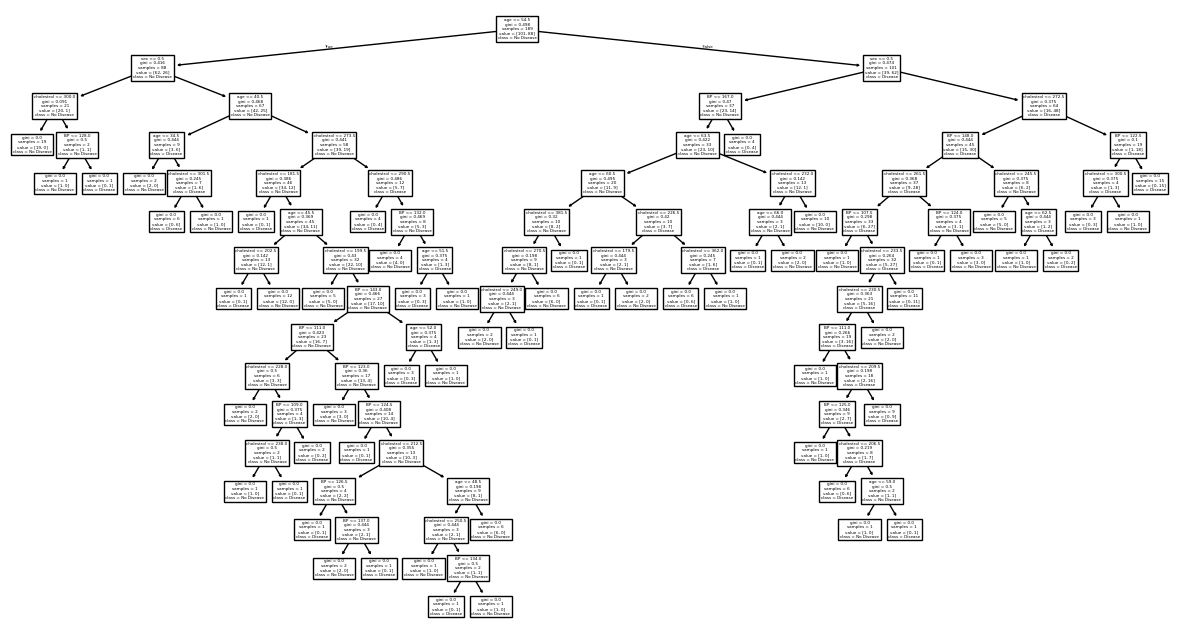

In [30]:
get_dt_graph(dt_min_leaf)

In [31]:
evaluate_model(dt_min_leaf)

Train Accuracy : 1.0
Train Confusion Matrix:
[[101   0]
 [  0  88]]
--------------------------------------------------
Test Accuracy : 0.6296296296296297
Test Confusion Matrix:
[[31 18]
 [12 20]]


## 6. `Entropy` instead of `Gini`

In [32]:
dt_min_leaf_entropy = DecisionTreeClassifier(min_samples_leaf=20, random_state=42, criterion="entropy")
dt_min_leaf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20,
                       random_state=42)

[Text(0.4444444444444444, 0.9, 'age <= 54.5\nentropy = 0.997\nsamples = 189\nvalue = [101, 88]\nclass = No Disease'),
 Text(0.2222222222222222, 0.7, 'sex <= 0.5\nentropy = 0.876\nsamples = 88\nvalue = [62, 26]\nclass = No Disease'),
 Text(0.3333333333333333, 0.8, 'True  '),
 Text(0.1111111111111111, 0.5, 'entropy = 0.276\nsamples = 21\nvalue = [20, 1]\nclass = No Disease'),
 Text(0.3333333333333333, 0.5, 'cholestrol <= 253.0\nentropy = 0.953\nsamples = 67\nvalue = [42, 25]\nclass = No Disease'),
 Text(0.2222222222222222, 0.3, 'BP <= 121.0\nentropy = 0.903\nsamples = 47\nvalue = [32, 15]\nclass = No Disease'),
 Text(0.1111111111111111, 0.1, 'entropy = 0.976\nsamples = 22\nvalue = [13, 9]\nclass = No Disease'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.795\nsamples = 25\nvalue = [19, 6]\nclass = No Disease'),
 Text(0.4444444444444444, 0.3, 'entropy = 1.0\nsamples = 20\nvalue = [10, 10]\nclass = No Disease'),
 Text(0.6666666666666666, 0.7, 'sex <= 0.5\nentropy = 0.962\nsamples = 101\nva

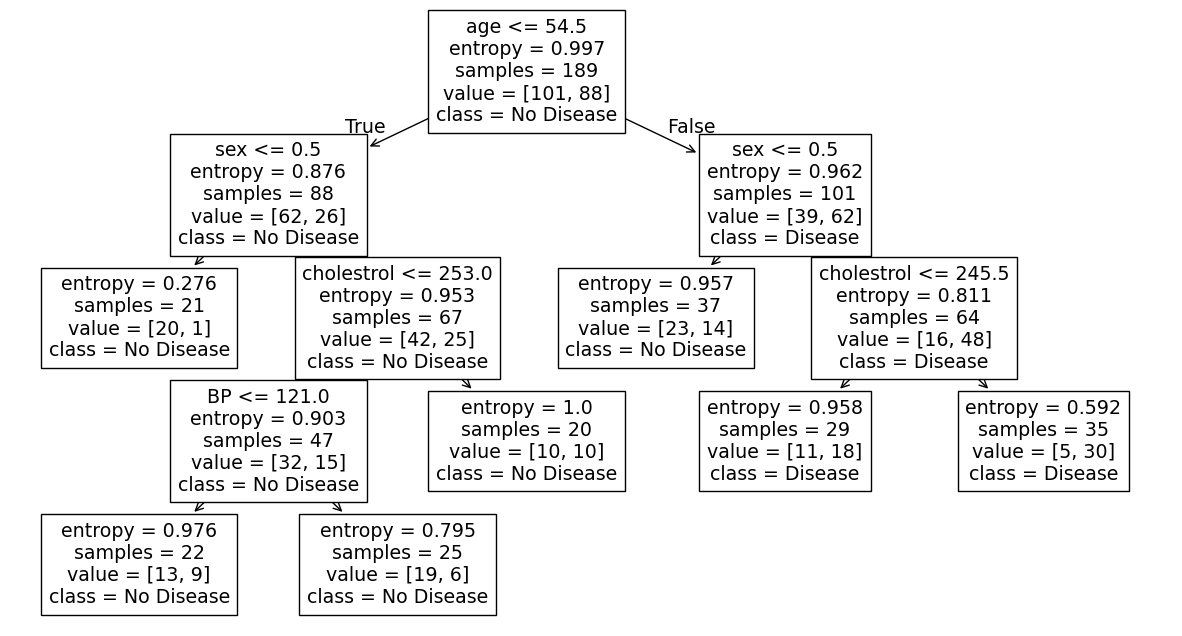

In [33]:
get_dt_graph(dt_min_leaf_entropy)

In [34]:
evaluate_model(dt_min_leaf_entropy)

Train Accuracy : 0.7037037037037037
Train Confusion Matrix:
[[85 16]
 [40 48]]
--------------------------------------------------
Test Accuracy : 0.6419753086419753
Test Confusion Matrix:
[[38 11]
 [18 14]]


## 7. Hyper-parameter tuning

In [35]:
dt = DecisionTreeClassifier(random_state=42)

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [38]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy") # Try using scoring = 'f1'

In [39]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
CPU times: total: 984 ms
Wall time: 8.44 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [40]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010451,0.002184,0.008567,0.003205,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.708333,0.744681,0.617021,0.531915,0.650488,0.082762,17
1,0.010645,0.002045,0.005531,0.000341,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.708333,0.744681,0.617021,0.531915,0.650488,0.082762,17
2,0.011081,0.003181,0.006167,0.001485,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.687500,0.744681,0.617021,0.531915,0.645279,0.079551,20
3,0.007427,0.001330,0.003802,0.000563,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,3
4,0.007157,0.000825,0.006389,0.001645,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.541667,0.531915,0.531915,0.531915,0.534353,0.004223,41


In [41]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
30,0.006955,0.001645,0.004385,0.000285,entropy,3,5,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.604167,0.765957,0.617021,0.680851,0.666999,0.064090,1
5,0.006570,0.000752,0.004886,0.000898,gini,3,5,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.625000,0.744681,0.595745,0.659574,0.656250,0.055831,2
3,0.007427,0.001330,0.003802,0.000563,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,3
8,0.006389,0.000967,0.004996,0.001219,gini,3,50,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,3
13,0.007136,0.000229,0.005769,0.001608,gini,5,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,3


In [42]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=42)

In [43]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=42)

In [44]:
grid_search.best_score_

0.6669991134751774

In [45]:
dt_best = grid_search.best_estimator_

In [46]:
evaluate_model(dt_best)

Train Accuracy : 0.7195767195767195
Train Confusion Matrix:
[[82 19]
 [34 54]]
--------------------------------------------------
Test Accuracy : 0.6172839506172839
Test Confusion Matrix:
[[36 13]
 [18 14]]


In [47]:
from sklearn.metrics import classification_report

In [48]:
print(classification_report(y_test, dt_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70        49
           1       0.52      0.44      0.47        32

    accuracy                           0.62        81
   macro avg       0.59      0.59      0.59        81
weighted avg       0.61      0.62      0.61        81



[Text(0.5, 0.875, 'age <= 54.5\nentropy = 0.997\nsamples = 189\nvalue = [101, 88]\nclass = No Disease'),
 Text(0.25, 0.625, 'sex <= 0.5\nentropy = 0.876\nsamples = 88\nvalue = [62, 26]\nclass = No Disease'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'cholestrol <= 266.0\nentropy = 0.276\nsamples = 21\nvalue = [20, 1]\nclass = No Disease'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 16\nvalue = [16, 0]\nclass = No Disease'),
 Text(0.1875, 0.125, 'entropy = 0.722\nsamples = 5\nvalue = [4, 1]\nclass = No Disease'),
 Text(0.375, 0.375, 'age <= 40.5\nentropy = 0.953\nsamples = 67\nvalue = [42, 25]\nclass = No Disease'),
 Text(0.3125, 0.125, 'entropy = 0.918\nsamples = 9\nvalue = [3, 6]\nclass = Disease'),
 Text(0.4375, 0.125, 'entropy = 0.912\nsamples = 58\nvalue = [39, 19]\nclass = No Disease'),
 Text(0.75, 0.625, 'sex <= 0.5\nentropy = 0.962\nsamples = 101\nvalue = [39, 62]\nclass = Disease'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'age <= 66.5\nentropy = 0.957\nsa

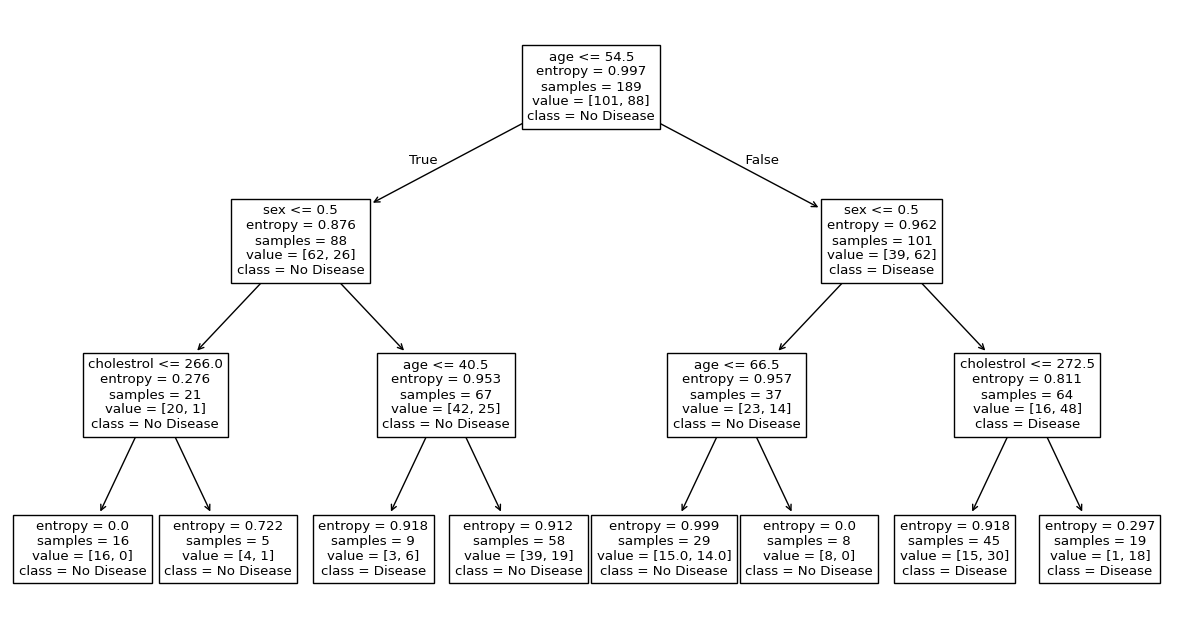

In [49]:
get_dt_graph(dt_best)